In [5]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier, NeighborhoodComponentsAnalysis
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import train_test_split

# Define the categories
categories = ['Beer', 'Burger', 'Champagne', 'Cider', 'CoffeeTeaMilk', 'Dessert', 
              'Kids', 'Other', 'Salad', 'SoftDrinks', 'Spirits', 'VariedFood', 'Wine', 'Wings']

Since k-NN can perform poorly on high-dimensional data, we can perform dimensionality reduction. We will first be using PCA to determine how many dimensions we want to keep. We will then do the actual dimensionality reduction with NCA. In the end, we will run k-NN again and compare the results. 

In [2]:
# Import the relevant datasets
df_distil_orig = pd.read_csv('/content/df-orig-distil-class-le.csv')
df_distil_proc = pd.read_csv('/content/df-proc-distil-class-le.csv')
df_para_mini_orig = pd.read_csv('/content/df-orig-para-mini-class-le.csv')
df_para_mini_proc = pd.read_csv('/content/df-proc-para-mini-class-le.csv')
df_para_base_orig = pd.read_csv('/content/df-orig-para-base-class-le.csv')
df_para_base_proc = pd.read_csv('/content/df-proc-para-base-class-le.csv')

In [3]:
# Process the datasets

target_distil_orig = df_distil_orig['Class1']
target_distil_proc = df_distil_proc['Class1']
target_para_mini_orig = df_para_mini_orig['Class1']
target_para_mini_proc = df_para_mini_proc['Class1']
target_para_base_orig = df_para_base_orig['Class1']
target_para_base_proc = df_para_base_proc['Class1']

features_distil_orig = df_distil_orig.drop(labels=['ArticleName', 'ArticleGroupName',
                                                   'Class1', 'ClassLabel'], axis=1)
features_distil_proc = df_distil_proc.drop(labels=['ArticleName', 'ArticleGroupName',
                                                   'Class1', 'ClassLabel'], axis=1)
features_para_mini_orig = df_para_mini_orig.drop(labels=['ArticleName', 'ArticleGroupName',
                                                   'Class1', 'ClassLabel'], axis=1)
features_para_mini_proc = df_para_mini_proc.drop(labels=['ArticleName', 'ArticleGroupName',
                                                   'Class1', 'ClassLabel'], axis=1)
features_para_base_orig = df_para_base_orig.drop(labels=['ArticleName', 'ArticleGroupName',
                                                   'Class1', 'ClassLabel'], axis=1)
features_para_base_proc = df_para_base_proc.drop(labels=['ArticleName', 'ArticleGroupName',
                                                   'Class1', 'ClassLabel'], axis=1)


In [4]:
# Inspect the data
print(target_distil_orig.head())
print(features_distil_orig.head())

0       Beer
1    Spirits
2       Beer
3       Beer
4       Beer
Name: Class1, dtype: object
         f1        f2        f3        f4        f5        f6        f7  \
0 -0.026189  0.006060  0.041086  0.025029 -0.005661  0.037130 -0.035496   
1  0.023900 -0.009981 -0.008938  0.040667  0.004618 -0.007182 -0.004422   
2  0.016722  0.020315  0.009439  0.004678 -0.023396  0.021774  0.021089   
3 -0.016679 -0.003197 -0.007333  0.025001 -0.027456  0.044520 -0.071754   
4 -0.034850  0.008967  0.014533  0.027832  0.001960  0.071814 -0.058077   

         f8        f9       f10  ...      f503      f504      f505      f506  \
0  0.003412  0.014655  0.005278  ...  0.044880  0.042281  0.052952  0.007845   
1 -0.043731 -0.035616 -0.023450  ...  0.041395  0.004719  0.055949  0.064635   
2 -0.009884 -0.021551 -0.003760  ...  0.012943 -0.026992 -0.001448  0.036863   
3  0.048895  0.009105 -0.005698  ...  0.031430  0.019205  0.043745 -0.041126   
4 -0.003800  0.008434 -0.006219  ...  0.055313  0.041824

In [103]:
# Examine how much variance is kept after PCA with certain nr of components 
# Distiluse model
# Original data
variance_distil_orig = []
found_dim_orig = False
for i in range(175, min(len(features_distil_orig.columns), len(features_distil_orig)), 1):
  pca = PCA(n_components=i)
  princ_comp = pca.fit_transform(features_distil_orig)
  # Calculate the variance explained by priciple components
  var = round(sum(list(pca.explained_variance_ratio_))*100, 2)
  variance_distil_orig.append(var)
  if not found_dim_orig and var > 99:
    print("For distil_orig choose nr of components = ", i, "which gives variance = ", var, "\n")
    found_dim_orig = True
    break

# Processed data
variance_distil_proc = []
found_dim_proc = False
for i in range(175, min(len(features_distil_proc.columns), len(features_distil_proc)), 1):
  pca = PCA(n_components=i)
  princ_comp = pca.fit_transform(features_distil_proc)
  # Calculate the variance explained by priciple components
  var = round(sum(list(pca.explained_variance_ratio_))*100, 2)
  variance_distil_proc.append(var)
  if not found_dim_proc and var > 99:
    print("For distil_proc choose nr of components = ", i, "which gives variance = ", var, "\n")
    found_dim_proc = True
    break

For distil_orig choose nr of components =  198 which gives variance =  99.02 

For distil_proc choose nr of components =  190 which gives variance =  99.02 



In [97]:
# Examine how much variance is kept after PCA with certain nr of components 
# Para-mini model
# Original data
variance_para_mini_orig = []
found_dim_orig = False
for i in range(130, min(len(features_para_mini_orig.columns), len(features_para_mini_orig)), 1):
  pca = PCA(n_components=i)
  princ_comp = pca.fit_transform(features_para_mini_orig)
  # Calculate the variance explained by priciple components
  var = round(sum(list(pca.explained_variance_ratio_))*100, 2)
  variance_para_mini_orig.append(var)
  if not found_dim_orig and var > 99:
    print("For para-mini-orig choose nr of components = ", i, "which gives variance = ", var, "\n")
    found_dim_orig = True
    break

# Processed data
variance_para_mini_proc = []
found_dim_proc = False
for i in range(130, min(len(features_para_mini_proc.columns), len(features_para_mini_proc)), 1):
  pca = PCA(n_components=i)
  princ_comp = pca.fit_transform(features_para_mini_proc)
  # Calculate the variance explained by priciple components
  var = round(sum(list(pca.explained_variance_ratio_))*100, 2)
  variance_para_mini_proc.append(var)
  if not found_dim_proc and var > 99:
    print("For para-mini-proc choose nr of components = ", i, "which gives variance = ", var, "\n")
    found_dim_proc = True
    break

For para-mini-orig choose nr of components =  152 which gives variance =  99.02 

For para-mini-proc choose nr of components =  148 which gives variance =  99.02 



In [112]:
# Examine how much variance is kept after PCA with certain nr of components 
# Para-base model
# Original data
variance_para_base_orig = []
found_dim_orig = False
for i in range(155, min(len(features_para_base_orig.columns), len(features_para_base_orig)), 1):
  pca = PCA(n_components=i)
  princ_comp = pca.fit_transform(features_para_base_orig)
  # Calculate the variance explained by priciple components
  var = round(sum(list(pca.explained_variance_ratio_))*100, 2)
  variance_para_base_orig.append(var)
  if not found_dim_orig and var > 99:
    print("For para-base-orig choose nr of components = ", i, "which gives variance = ", var, "\n")
    found_dim_orig = True
    break

# Processed data
variance_para_base_proc = []
found_dim_proc = False
for i in range(155, min(len(features_para_base_proc.columns), len(features_para_base_proc)), 1):
  pca = PCA(n_components=i)
  princ_comp = pca.fit_transform(features_para_base_proc)
  # Calculate the variance explained by priciple components
  var = round(sum(list(pca.explained_variance_ratio_))*100, 2)
  variance_para_base_proc.append(var)
  if not found_dim_proc and var > 99:
    print("For para-base-proc choose nr of components = ", i, "which gives variance = ", var, "\n")
    found_dim_proc = True
    break

For para-base-orig choose nr of components =  179 which gives variance =  99.02 

For para-base-proc choose nr of components =  174 which gives variance =  99.02 



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


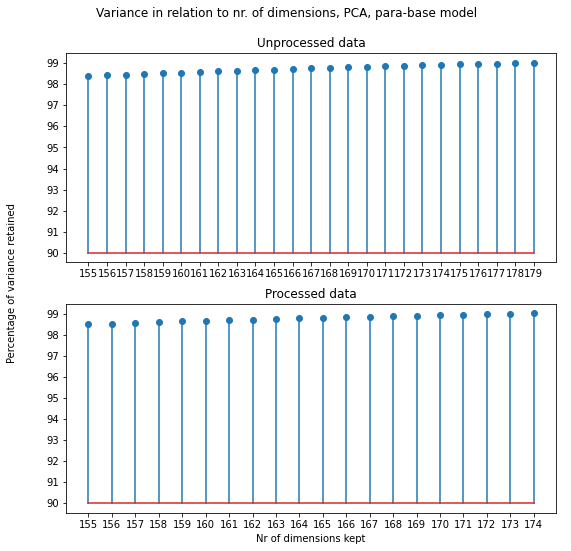

In [113]:
''' Visualise the variance for all datasets. 
Models: 
'distiluse-base-multilingual-cased-v2',  
'paraphrase-multilingual-MiniLM-L12-v2' and
'paraphrase-multilingual-mpnet-base-v2'. 
'''
fig = plt.figure()
fig.set_size_inches(8,8)
ax = fig.add_subplot(111)
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

#plt.ylim(80, 100)
# Turn off axis lines and ticks of the big subplot
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['right'].set_color('none')
ax.tick_params(labelcolor='w', top=False, bottom=False, left=False, right=False)

# Set the x axis
dim_orig = [x for x in range(155, 155+len(variance_para_base_orig), 1)] 
dim_proc = [x for x in range(155, 155+len(variance_para_base_proc), 1)] 
# Plot the variances
ax1.stem(dim_orig, variance_para_base_orig, bottom=90)
ax2.stem(dim_proc, variance_para_base_proc, bottom=90)
ax1.set_yticks(np.arange(90, 100, 1))
ax2.set_yticks(np.arange(90, 100, 1))
ax1.set_xticks(np.arange(155, 155+len(variance_para_base_orig), 1))
ax2.set_xticks(np.arange(155, 155+len(variance_para_base_proc), 1))

# Set the suptitle and common labels
fig.suptitle(
    'Variance in relation to nr. of dimensions, PCA, para-base model')

ax.set_xlabel('Nr of dimensions kept')
ax.set_ylabel('Percentage of variance retained')

ax1.set_title('Unprocessed data')
ax2.set_title('Processed data')

# Adjust sizes of subplots automatically
plt.tight_layout()

# Adjust the suptitle overlap
plt.subplots_adjust(top=0.9)
# Fix the position of the y label
ax.yaxis.set_label_coords(-0.1,0.5)

# Change here for different datasets
plt.savefig('variance-para-base', dpi=300)
plt.show()

We wanted to keep the exact same amount of variance from every dataset so that we can make meaningful comparisons between the performances of k-NN. We now know that we will keep the following nr. of dimensions:

distiluse_orig = 198

distiluse_proc = 190

para_mini_orig = 152

para_mini_proc = 148

para_base_orig = 179

para_base_proc = 174

In this way we will retain the exact same percentage of variance for every dataset, namely 99.02 percent. 

Now we need to split the datasets into training and test datasets.

In [20]:
# Distiluse model
# Original data
(X_train_distil_orig, X_test_distil_orig, 
 y_train_distil_orig, y_test_distil_orig) = train_test_split(features_distil_orig, target_distil_orig, test_size = 0.2,
                                                             random_state = 42, stratify=df_distil_orig['Class1'])
# Processed data
(X_train_distil_proc, X_test_distil_proc, 
 y_train_distil_proc, y_test_distil_proc) = train_test_split(features_distil_proc, target_distil_proc, test_size = 0.2,
                                                             random_state = 42, stratify=df_distil_proc['Class1'])

# Para-mini model
# Original data
(X_train_para_mini_orig, X_test_para_mini_orig, 
 y_train_para_mini_orig, y_test_para_mini_orig) = train_test_split(features_para_mini_orig, target_para_mini_orig, test_size = 0.2,
                                                             random_state = 42, stratify=df_para_mini_orig['Class1'])
# Processed data
(X_train_para_mini_proc, X_test_para_mini_proc, 
 y_train_para_mini_proc, y_test_para_mini_proc) = train_test_split(features_para_mini_proc, target_para_mini_proc, test_size = 0.2,
                                                             random_state = 42, stratify=df_para_mini_proc['Class1'])

# Para-base model
# Original data
(X_train_para_base_orig, X_test_para_base_orig, 
 y_train_para_base_orig, y_test_para_base_orig) = train_test_split(features_para_base_orig, target_para_base_orig, test_size = 0.2,
                                                             random_state = 42, stratify=df_para_base_orig['Class1'])

# Processed data
(X_train_para_base_proc, X_test_para_base_proc, 
 y_train_para_base_proc, y_test_para_base_proc) = train_test_split(features_para_base_proc, target_para_base_proc, test_size = 0.2,
                                                             random_state = 42, stratify=df_para_base_proc['Class1'])


Now let us perform the dimensionality reduction and run k-NN.

Report distil_orig = /n {'Beer': {'precision': 1.0, 'recall': 0.9047619047619048, 'f1-score': 0.9500000000000001, 'support': 21}, 'Burger': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 4}, 'Champagne': {'precision': 0.3333333333333333, 'recall': 1.0, 'f1-score': 0.5, 'support': 1}, 'Cider': {'precision': 1.0, 'recall': 0.6666666666666666, 'f1-score': 0.8, 'support': 3}, 'CoffeeTeaMilk': {'precision': 0.8, 'recall': 0.5714285714285714, 'f1-score': 0.6666666666666666, 'support': 7}, 'Dessert': {'precision': 1.0, 'recall': 0.5, 'f1-score': 0.6666666666666666, 'support': 2}, 'Kids': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 3}, 'Other': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 1}, 'Salad': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 1}, 'SoftDrinks': {'precision': 0.8888888888888888, 'recall': 0.8, 'f1-score': 0.8421052631578948, 'support': 10}, 'Spirits': {'precision': 0.8695652173913043, 'recall': 1.0, 'f1-score'

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Report distil_proc = /n {'Beer': {'precision': 0.7, 'recall': 0.5833333333333334, 'f1-score': 0.6363636363636365, 'support': 12}, 'Burger': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 4}, 'Champagne': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 1}, 'Cider': {'precision': 1.0, 'recall': 0.3333333333333333, 'f1-score': 0.5, 'support': 3}, 'CoffeeTeaMilk': {'precision': 0.75, 'recall': 0.5, 'f1-score': 0.6, 'support': 6}, 'Dessert': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 2}, 'Kids': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 3}, 'Other': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 1}, 'Salad': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 1}, 'SoftDrinks': {'precision': 0.4444444444444444, 'recall': 0.6666666666666666, 'f1-score': 0.5333333333333333, 'support': 6}, 'Spirits': {'precision': 0.6111111111111112, 'recall': 0.6875, 'f1-score': 0.6470588235294118, 'support': 16}, 'Var

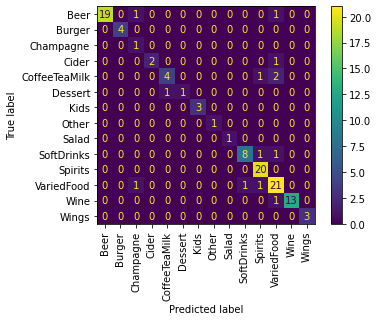

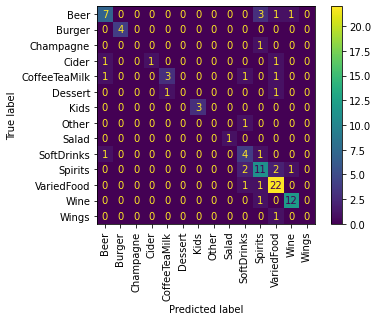

In [22]:
# Distiluse model
# Original data
# Reduce dimensions
nca_distil_orig = NeighborhoodComponentsAnalysis(n_components=198, random_state=42)
# Use a nearest neighbor classifier to evaluate the methods
knn_orig = KNeighborsClassifier(n_neighbors=5)
# Fit the NCA model
nca_distil_orig.fit(X_train_distil_orig, y_train_distil_orig)
# Fit a nearest neighbor classifier on the embedded training set
knn_orig.fit(nca_distil_orig.transform(X_train_distil_orig), y_train_distil_orig)
# Evaluate the accuracy on the test set
pred_distil_orig = knn_orig.predict(nca_distil_orig.transform(X_test_distil_orig))
class_report_distil_orig = classification_report(y_test_distil_orig, 
                                                  pred_distil_orig, output_dict=True)
cm_distil_orig = ConfusionMatrixDisplay.from_predictions(y_test_distil_orig,
                                                          pred_distil_orig, xticks_rotation='vertical')                                                 
print("Report distil_orig = /n", class_report_distil_orig)

# Processed data
# Reduce dimensions
nca_distil_proc = NeighborhoodComponentsAnalysis(n_components=190, random_state=42)
# Use a nearest neighbor classifier to evaluate the methods
knn_proc = KNeighborsClassifier(n_neighbors=3)
# Fit the NCA model
nca_distil_proc.fit(X_train_distil_proc, y_train_distil_proc)
# Fit a nearest neighbor classifier on the embedded training set
knn_proc.fit(nca_distil_proc.transform(X_train_distil_proc), y_train_distil_proc)
# Evaluate the accuracy on the test set
pred_distil_proc = knn_proc.predict(nca_distil_proc.transform(X_test_distil_proc))
class_report_distil_proc = classification_report(y_test_distil_proc, 
                                                  pred_distil_proc, output_dict=True)
cm_distil_proc = ConfusionMatrixDisplay.from_predictions(y_test_distil_proc,
                                                          pred_distil_proc, xticks_rotation='vertical')                                                 
print("Report distil_proc = /n", class_report_distil_proc)


df_report_distil_dim_nca_orig = pd.DataFrame(class_report_distil_orig).transpose()
df_report_distil_dim_nca_proc = pd.DataFrame(class_report_distil_proc).transpose()
df_report_distil_dim_nca_orig.to_csv('df-report-distil-dim-nca-orig.csv')
df_report_distil_dim_nca_proc.to_csv('df-report-distil-dim-nca-proc.csv')

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Report para_mini_orig = /n {'Beer': {'precision': 0.8181818181818182, 'recall': 0.8571428571428571, 'f1-score': 0.8372093023255814, 'support': 21}, 'Burger': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 4}, 'Champagne': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 1}, 'Cider': {'precision': 0.75, 'recall': 1.0, 'f1-score': 0.8571428571428571, 'support': 3}, 'CoffeeTeaMilk': {'precision': 0.8333333333333334, 'recall': 0.7142857142857143, 'f1-score': 0.7692307692307692, 'support': 7}, 'Dessert': {'precision': 1.0, 'recall': 0.5, 'f1-score': 0.6666666666666666, 'support': 2}, 'Kids': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 3}, 'Other': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 1}, 'Salad': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 1}, 'SoftDrinks': {'precision': 0.75, 'recall': 0.9, 'f1-score': 0.8181818181818182, 'support': 10}, 'Spirits': {'precision': 0.6666666666666666, 'recall': 0.8, 'f1-s

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Report para_mini_proc = /n {'Beer': {'precision': 0.6666666666666666, 'recall': 0.5, 'f1-score': 0.5714285714285715, 'support': 12}, 'Burger': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 4}, 'Champagne': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 1}, 'Cider': {'precision': 0.5, 'recall': 0.6666666666666666, 'f1-score': 0.5714285714285715, 'support': 3}, 'CoffeeTeaMilk': {'precision': 0.3333333333333333, 'recall': 0.16666666666666666, 'f1-score': 0.2222222222222222, 'support': 6}, 'Dessert': {'precision': 1.0, 'recall': 0.5, 'f1-score': 0.6666666666666666, 'support': 2}, 'Kids': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 3}, 'Other': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 1}, 'Salad': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 1}, 'SoftDrinks': {'precision': 0.8, 'recall': 0.6666666666666666, 'f1-score': 0.7272727272727272, 'support': 6}, 'Spirits': {'precision': 0.5789473684210527, 'recall

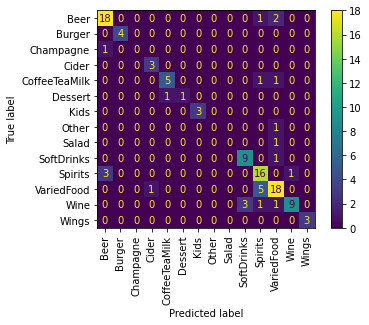

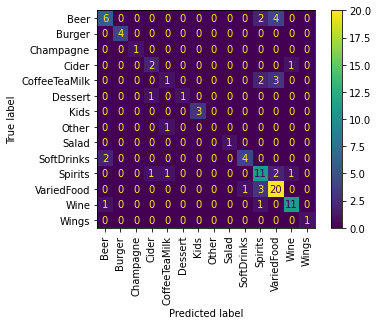

In [23]:
# Para-mini model
# Original data
# Reduce dimensions
nca_para_mini_orig = NeighborhoodComponentsAnalysis(n_components=152, random_state=42)
# Use a nearest neighbor classifier to evaluate the methods
knn_orig = KNeighborsClassifier(n_neighbors=5)
# Fit the NCA model
nca_para_mini_orig.fit(X_train_para_mini_orig, y_train_para_mini_orig)
# Fit a nearest neighbor classifier on the embedded training set
knn_orig.fit(nca_para_mini_orig.transform(X_train_para_mini_orig), y_train_para_mini_orig)
# Evaluate the accuracy on the test set
pred_para_mini_orig = knn_orig.predict(nca_para_mini_orig.transform(X_test_para_mini_orig))
class_report_para_mini_orig = classification_report(y_test_para_mini_orig, 
                                                  pred_para_mini_orig, output_dict=True)
cm_para_mini_orig = ConfusionMatrixDisplay.from_predictions(y_test_para_mini_orig,
                                                          pred_para_mini_orig, xticks_rotation='vertical')                                                 
print("Report para_mini_orig = /n", class_report_para_mini_orig)

# Processed data
# Reduce dimensions
nca_para_mini_proc = NeighborhoodComponentsAnalysis(n_components=148, random_state=42)
# Use a nearest neighbor classifier to evaluate the methods
knn_proc = KNeighborsClassifier(n_neighbors=3)
# Fit the NCA model
nca_para_mini_proc.fit(X_train_para_mini_proc, y_train_para_mini_proc)
# Fit a nearest neighbor classifier on the embedded training set
knn_proc.fit(nca_para_mini_proc.transform(X_train_para_mini_proc), y_train_para_mini_proc)
# Evaluate the accuracy on the test set
pred_para_mini_proc = knn_proc.predict(nca_para_mini_proc.transform(X_test_para_mini_proc))
class_report_para_mini_proc = classification_report(y_test_para_mini_proc, 
                                                  pred_para_mini_proc, output_dict=True)
cm_para_mini_proc = ConfusionMatrixDisplay.from_predictions(y_test_para_mini_proc,
                                                          pred_para_mini_proc, xticks_rotation='vertical')                                                 
print("Report para_mini_proc = /n", class_report_para_mini_proc)

df_report_para_mini_dim_nca_orig = pd.DataFrame(class_report_para_mini_orig).transpose()
df_report_para_mini_dim_nca_proc = pd.DataFrame(class_report_para_mini_proc).transpose()
df_report_para_mini_dim_nca_orig.to_csv('df-report-para-mini-dim-nca-orig.csv')
df_report_para_mini_dim_nca_proc.to_csv('df-report-para-mini-dim-nca-proc.csv')

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Report para_base_orig = /n {'Beer': {'precision': 0.7407407407407407, 'recall': 0.9523809523809523, 'f1-score': 0.8333333333333334, 'support': 21}, 'Burger': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 4}, 'Champagne': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 1}, 'Cider': {'precision': 1.0, 'recall': 0.6666666666666666, 'f1-score': 0.8, 'support': 3}, 'CoffeeTeaMilk': {'precision': 0.8571428571428571, 'recall': 0.8571428571428571, 'f1-score': 0.8571428571428571, 'support': 7}, 'Dessert': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 2}, 'Kids': {'precision': 1.0, 'recall': 0.3333333333333333, 'f1-score': 0.5, 'support': 3}, 'Other': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 1}, 'Salad': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 1}, 'SoftDrinks': {'precision': 0.7777777777777778, 'recall': 0.7, 'f1-score': 0.7368421052631577, 'support': 10}, 'Spirits': {'precision': 0.7777777777777778, 'recall

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Report para_base_proc = /n {'Beer': {'precision': 0.8, 'recall': 0.6666666666666666, 'f1-score': 0.7272727272727272, 'support': 12}, 'Burger': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 4}, 'Champagne': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 1}, 'Cider': {'precision': 1.0, 'recall': 0.3333333333333333, 'f1-score': 0.5, 'support': 3}, 'CoffeeTeaMilk': {'precision': 0.6666666666666666, 'recall': 0.3333333333333333, 'f1-score': 0.4444444444444444, 'support': 6}, 'Dessert': {'precision': 0.5, 'recall': 0.5, 'f1-score': 0.5, 'support': 2}, 'Kids': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 3}, 'Other': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 1}, 'Salad': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 1}, 'SoftDrinks': {'precision': 0.46153846153846156, 'recall': 1.0, 'f1-score': 0.631578947368421, 'support': 6}, 'Spirits': {'precision': 0.6153846153846154, 'recall': 0.5, 'f1-score': 0.551724137

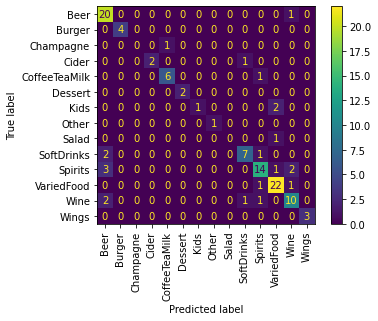

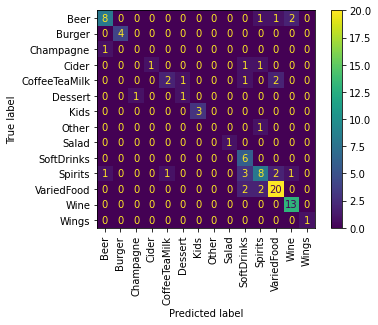

In [24]:
# Para-base model
# Original data
# Reduce dimensions
nca_para_base_orig = NeighborhoodComponentsAnalysis(n_components=179, random_state=42)
# Use a nearest neighbor classifier to evaluate the methods
knn_orig = KNeighborsClassifier(n_neighbors=5)
# Fit the NCA model
nca_para_base_orig.fit(X_train_para_base_orig, y_train_para_base_orig)
# Fit a nearest neighbor classifier on the embedded training set
knn_orig.fit(nca_para_base_orig.transform(X_train_para_base_orig), y_train_para_base_orig)
# Evaluate the accuracy on the test set
pred_para_base_orig = knn_orig.predict(nca_para_base_orig.transform(X_test_para_base_orig))
class_report_para_base_orig = classification_report(y_test_para_base_orig, 
                                                  pred_para_base_orig, output_dict=True)
cm_para_base_orig = ConfusionMatrixDisplay.from_predictions(y_test_para_base_orig,
                                                          pred_para_base_orig, xticks_rotation='vertical')                                                 
print("Report para_base_orig = /n", class_report_para_base_orig)

# Processed data
# Reduce dimensions
nca_para_base_proc = NeighborhoodComponentsAnalysis(n_components=174, random_state=42)
# Use a nearest neighbor classifier to evaluate the methods
knn_proc = KNeighborsClassifier(n_neighbors=3)
# Fit the NCA model
nca_para_base_proc.fit(X_train_para_base_proc, y_train_para_base_proc)
# Fit a nearest neighbor classifier on the embedded training set
knn_proc.fit(nca_para_base_proc.transform(X_train_para_base_proc), y_train_para_base_proc)
# Evaluate the accuracy on the test set
pred_para_base_proc = knn_proc.predict(nca_para_base_proc.transform(X_test_para_base_proc))
class_report_para_base_proc = classification_report(y_test_para_base_proc, 
                                                  pred_para_base_proc, output_dict=True)
cm_para_base_proc = ConfusionMatrixDisplay.from_predictions(y_test_para_base_proc,
                                                          pred_para_base_proc, xticks_rotation='vertical')                                                 
print("Report para_base_proc = /n", class_report_para_base_proc)

df_report_para_base_dim_nca_orig = pd.DataFrame(class_report_para_base_orig).transpose()
df_report_para_base_dim_nca_proc = pd.DataFrame(class_report_para_base_proc).transpose()
df_report_para_base_dim_nca_orig.to_csv('df-report-para-base-dim-nca-orig.csv')
df_report_para_base_dim_nca_proc.to_csv('df-report-para-base-dim-nca-proc.csv')

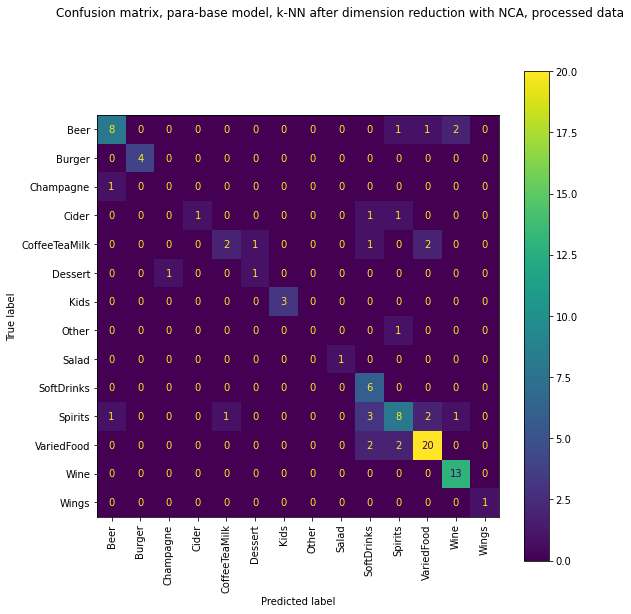

In [30]:
''' Visualise the confusion matrices for all datasets. 
Models: 
'distiluse-base-multilingual-cased-v2',  
'paraphrase-multilingual-MiniLM-L12-v2' and
'paraphrase-multilingual-mpnet-base-v2'. 
'''
fig = plt.figure()
fig.set_size_inches(9,9)
ax = fig.add_subplot(111)

# Subplots - change here for other datasets 
cm_para_base_proc.plot(xticks_rotation='vertical', ax=ax)

# Set the suptitle and common labels
fig.suptitle('Confusion matrix, para-base model, k-NN after dimension reduction with NCA, processed data')

# Change here for different datasets
plt.savefig('cm-para-base-dim-nca-proc', dpi=300)
plt.show()

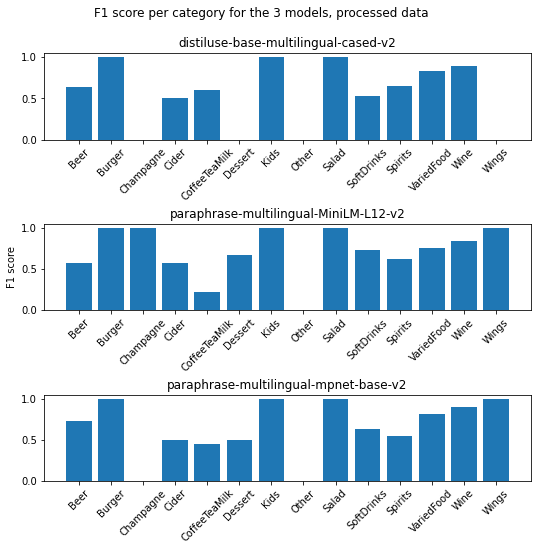

In [33]:
'''
Visualise the F1 score per category for all datasets.
Models: 
'distiluse-base-multilingual-cased-v2',  
'paraphrase-multilingual-MiniLM-L12-v2' and
'paraphrase-multilingual-mpnet-base-v2'. 
'''

# Plot grid
fig = plt.figure()
fig.set_size_inches(8,8)
ax = fig.add_subplot(111)

ax1 = fig.add_subplot(311)
ax2 = fig.add_subplot(312)
ax3 = fig.add_subplot(313)

# Turn off axis lines and ticks of the big subplot
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['right'].set_color('none')
ax.tick_params(labelcolor='w', top=False, bottom=False, left=False, right=False)

f1_distil_proc = df_report_distil_dim_nca_proc['f1-score'].values.tolist()
f1_para_mini_proc = df_report_para_mini_dim_nca_proc['f1-score'].values.tolist()
f1_para_base_proc = df_report_para_base_dim_nca_proc['f1-score'].values.tolist()

# Subplots - change arguments here for every score
ax1.bar(categories, f1_distil_proc[:14])
ax2.bar(categories, f1_para_mini_proc[:14])
ax3.bar(categories, f1_para_base_proc[:14])

ax1.tick_params(axis='x',labelrotation=45)
ax2.tick_params(axis='x',labelrotation=45)
ax3.tick_params(axis='x',labelrotation=45)

# Set the suptitle and common labels
fig.suptitle('F1 score per category for the 3 models, processed data')
ax.set_ylabel('F1 score')

# Set the subplot titles
ax1.set_title('distiluse-base-multilingual-cased-v2')
ax2.set_title('paraphrase-multilingual-MiniLM-L12-v2')
ax3.set_title('paraphrase-multilingual-mpnet-base-v2')

# Adjust sizes of subplots automatically
plt.tight_layout()

# Adjust the suptitle overlap
plt.subplots_adjust(top=0.9)

# Save and plot - change here for every score
plt.savefig('f1-cat-dim-nca-proc', dpi=300)
plt.show()

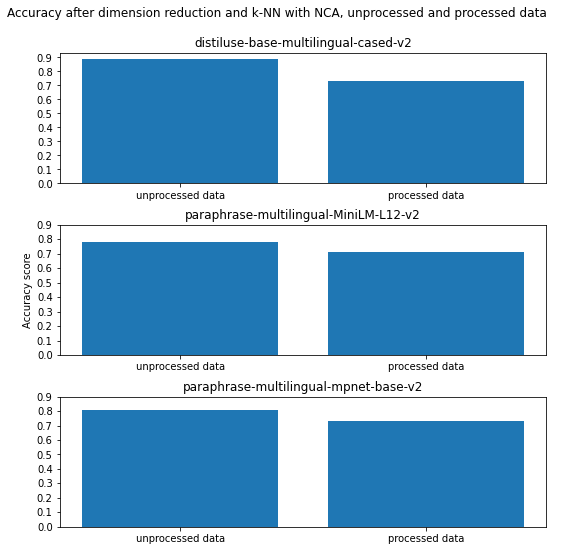

In [37]:
'''
Visualise the accuracy score for all datasets.
Models: 
'distiluse-base-multilingual-cased-v2',  
'paraphrase-multilingual-MiniLM-L12-v2' and
'paraphrase-multilingual-mpnet-base-v2'. 
'''

# Plot grid
fig = plt.figure()
fig.set_size_inches(8,8)
ax = fig.add_subplot(111)

ax1 = fig.add_subplot(311)
ax2 = fig.add_subplot(312)
ax3 = fig.add_subplot(313)

# Turn off axis lines and ticks of the big subplot
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['right'].set_color('none')
ax.tick_params(labelcolor='w', top=False, bottom=False, left=False, right=False)

acc_distil_orig = df_report_distil_dim_nca_orig['f1-score'].values.tolist()[14]
acc_distil_proc = df_report_distil_dim_nca_proc['f1-score'].values.tolist()[14]
acc_para_mini_orig = df_report_para_mini_dim_nca_orig['f1-score'].values.tolist()[14]
acc_para_mini_proc = df_report_para_mini_dim_nca_proc['f1-score'].values.tolist()[14]
acc_para_base_orig = df_report_para_base_dim_nca_orig['f1-score'].values.tolist()[14]
acc_para_base_proc = df_report_para_base_dim_nca_proc['f1-score'].values.tolist()[14]

categories = ['unprocessed data', 'processed data']
# Subplots - change arguments here for every score
ax1.bar(categories, [acc_distil_orig, acc_distil_proc])
ax2.bar(categories, [acc_para_mini_orig, acc_para_mini_proc])
ax3.bar(categories, [acc_para_base_orig, acc_para_base_proc])

ax1.set_yticks(np.arange(0,1,0.1))
ax2.set_yticks(np.arange(0,1,0.1))
ax3.set_yticks(np.arange(0,1,0.1))

# Set the suptitle and common labels
fig.suptitle('Accuracy after dimension reduction and k-NN with NCA, unprocessed and processed data')
ax.set_ylabel('Accuracy score')

# Set the subplot titles
ax1.set_title('distiluse-base-multilingual-cased-v2')
ax2.set_title('paraphrase-multilingual-MiniLM-L12-v2')
ax3.set_title('paraphrase-multilingual-mpnet-base-v2')

# Adjust sizes of subplots automatically
plt.tight_layout()

# Adjust the suptitle overlap
plt.subplots_adjust(top=0.9)

# Save and plot - change here for every score
plt.savefig('acc-dim-nca-score', dpi=300)
plt.show()

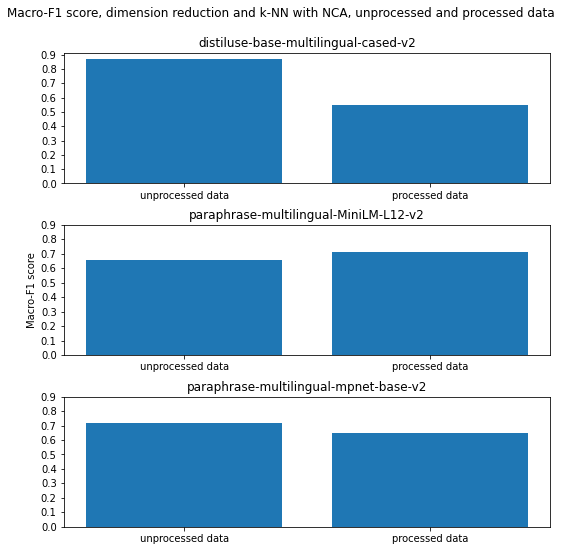

In [39]:
'''
Visualise the macro F1-score for all datasets.
Models: 
'distiluse-base-multilingual-cased-v2',  
'paraphrase-multilingual-MiniLM-L12-v2' and
'paraphrase-multilingual-mpnet-base-v2'. 
'''

# Plot grid
fig = plt.figure()
fig.set_size_inches(8,8)
ax = fig.add_subplot(111)

ax1 = fig.add_subplot(311)
ax2 = fig.add_subplot(312)
ax3 = fig.add_subplot(313)

# Turn off axis lines and ticks of the big subplot
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['right'].set_color('none')
ax.tick_params(labelcolor='w', top=False, bottom=False, left=False, right=False)

mac_f1_distil_orig = df_report_distil_dim_nca_orig['f1-score'].values.tolist()[15]
mac_f1_distil_proc = df_report_distil_dim_nca_proc['f1-score'].values.tolist()[15]
mac_f1_para_mini_orig = df_report_para_mini_dim_nca_orig['f1-score'].values.tolist()[15]
mac_f1_para_mini_proc = df_report_para_mini_dim_nca_proc['f1-score'].values.tolist()[15]
mac_f1_para_base_orig = df_report_para_base_dim_nca_orig['f1-score'].values.tolist()[15]
mac_f1_para_base_proc = df_report_para_base_dim_nca_proc['f1-score'].values.tolist()[15]

categories = ['unprocessed data', 'processed data']
# Subplots - change arguments here for every score
ax1.bar(categories, [mac_f1_distil_orig, mac_f1_distil_proc])
ax2.bar(categories, [mac_f1_para_mini_orig, mac_f1_para_mini_proc])
ax3.bar(categories, [mac_f1_para_base_orig, mac_f1_para_base_proc])

ax1.set_yticks(np.arange(0,1,0.1))
ax2.set_yticks(np.arange(0,1,0.1))
ax3.set_yticks(np.arange(0,1,0.1))

# Set the suptitle and common labels
fig.suptitle('Macro-F1 score, dimension reduction and k-NN with NCA, unprocessed and processed data')
ax.set_ylabel('Macro-F1 score')

# Set the subplot titles
ax1.set_title('distiluse-base-multilingual-cased-v2')
ax2.set_title('paraphrase-multilingual-MiniLM-L12-v2')
ax3.set_title('paraphrase-multilingual-mpnet-base-v2')

# Adjust sizes of subplots automatically
plt.tight_layout()

# Adjust the suptitle overlap
plt.subplots_adjust(top=0.9)

# Save and plot - change here for every score
plt.savefig('macro-f1-dim-nca-score', dpi=300)
plt.show()